In [1]:
from src.client import *
import glob

In [2]:
target = "http://127.0.0.1:5000/api/detect"
c = ObjectDetectionClient(target)

imagefiles = glob.glob("object-detection-SMALL/*")
print(len(imagefiles))

296


In [3]:
response = c.one_detection(imagefiles[0])
print(response.status_code)
data = response.json()
print(data["avg_total_time"])
boxes = data["boxes"]

200
8.169186353683472


Font not found, using default font.


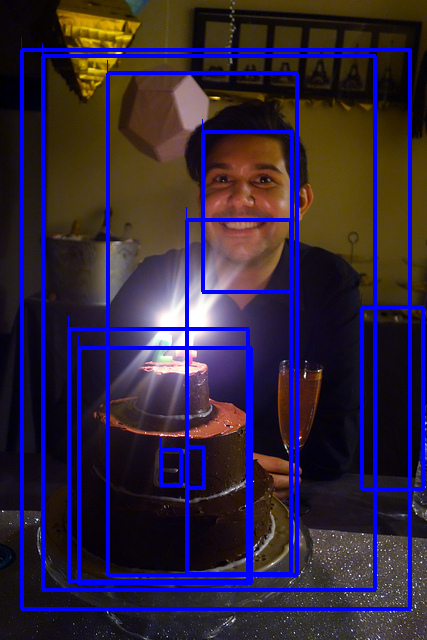

In [4]:
c.show_boxes(imagefiles[0], boxes[0])

In [8]:
response = c.detect_images(imagefiles[1:11])

In [10]:
data = response.json()
len(data["boxes"])

10

Font not found, using default font.


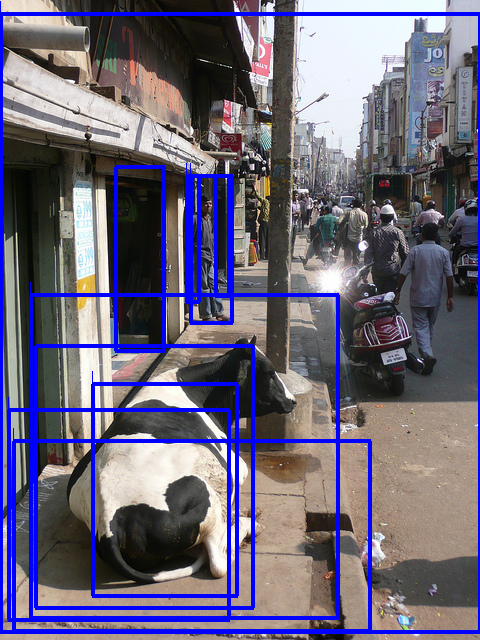

In [25]:
c.show_boxes(imagefiles[8], np.array(data["boxes"][7]))

In [5]:
# inference on all images one at a time
total_time = 0
inf_time = 0
for i in imagefiles:
    try:
        response = c.one_detection(i)
    except:
        print(i)
    rjson = response.json()
    total_time += rjson["total_time"]
    inf_time += rjson["inf_time"]
print("total:",total_time/len(imagefiles))
print("total:",inf_time/len(imagefiles))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [31]:
# inference on all images at once
response = c.detect_images(imagefiles)
print(response.json()["total_time"] / len(imagefiles))

0.10064221620559692


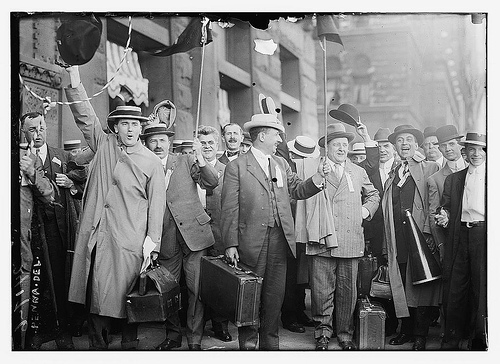

In [38]:
image = c.read_image("object-detection-SMALL/000000146964.jpg")
image

In [7]:
import tensorflow as tf

In [ ]:

for i in imagefiles:
    image = Image.open(i)
    converted_img  = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
    if len(converted_img.shape) < 4:
        print(i, converted_img.shape)

In [9]:
image = Image.open("object-detection-SMALL\\000000150561.jpg")
converted_img  = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis,...]
converted = tf.image.grayscale_to_rgb(converted_img)
converted

ValueError: Last dimension of a grayscale image should be size 1.

In [13]:
len(converted_img.shape)+1 <4

False